In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_8828\1285016483.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,25,18.0,False
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,1,1,6.0,False
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,5,0,0.0,True
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,2,11,9.0,False
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,4,3,2,4,4,4,0,0.0,False
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,4,5,5,5,4,0,0.0,True
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,2,4,3,4,5,2,0,0.0,False
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,4,3,2,5,4,4,0,0.0,True


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#разделяем данные на X и Y 

In [6]:
X = df.drop("satisfaction",axis = 1)
y = df["satisfaction"]

In [164]:
X.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: object

In [8]:
y

0         False
1         False
2          True
3         False
4          True
          ...  
129875    False
129876     True
129877    False
129878     True
129879    False
Name: satisfaction, Length: 129880, dtype: bool

In [9]:
#надо проверить есть ли дисбаланс классов (каждая оценка встречатся +- равное число раз)

In [10]:
df.groupby('satisfaction').agg({"Gender":"count"})

,Gender
satisfaction,
False,73452
True,56428


In [11]:
#False и True встречаться +- равное число раз

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [13]:
len(X_train)

97410

In [14]:
X_y_train = X_train.copy(deep = True)
X_y_train['y'] = y_train

In [15]:
X_y_train.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
y                                    False
dtype: bool

In [16]:
X_y_train["Arrival Delay in Minutes"].isna().sum()

294

In [17]:
#294 пропуска которые нужно запонить,например, срзнач

In [18]:
X_y_train["Arrival Delay in Minutes"].mean()

15.107737139091396

<Axes: >

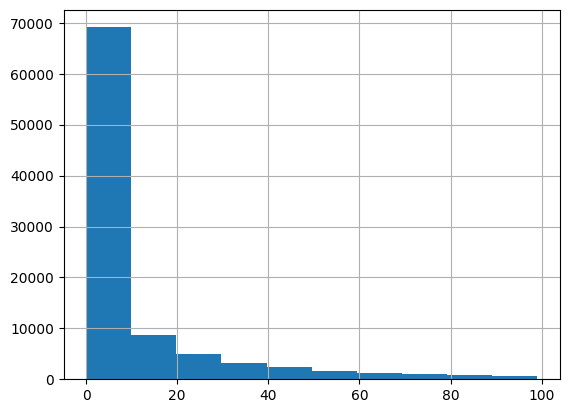

In [19]:
X_y_train[X_y_train["Arrival Delay in Minutes"]<100]["Arrival Delay in Minutes"].hist()

In [20]:
#большая часть это 0 

In [21]:
X_y_train["Arrival Delay in Minutes"].median()

0.0

In [22]:
#заменим прокуски на 5

In [23]:
X_y_train["Arrival Delay in Minutes"] = X_y_train["Arrival Delay in Minutes"].fillna(5)

In [24]:
X_y_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,y
2049,Male,Loyal Customer,41,Business travel,Eco,187,3,2,2,2,...,3,3,3,2,4,3,3,1,4.0,False
49176,Male,disloyal Customer,14,Business travel,Eco,1310,1,1,1,3,...,1,4,1,1,3,2,4,11,9.0,False
38346,Female,Loyal Customer,43,Business travel,Business,925,5,5,5,5,...,5,4,4,4,4,4,5,48,30.0,True
36699,Male,Loyal Customer,50,Business travel,Eco,925,3,4,4,4,...,3,3,3,3,3,1,3,0,0.0,False
20521,Female,Loyal Customer,55,Personal Travel,Eco,460,3,2,3,3,...,3,3,3,3,3,1,2,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,Male,Loyal Customer,50,Business travel,Business,1428,3,5,3,3,...,5,5,5,5,5,2,2,0,0.0,True
117952,Male,Loyal Customer,19,Business travel,Business,946,3,3,3,3,...,5,5,5,2,5,4,5,0,8.0,True
42613,Male,Loyal Customer,19,Personal Travel,Eco,493,5,5,5,1,...,3,3,4,5,4,3,3,0,0.0,True
43567,Female,Loyal Customer,69,Personal Travel,Eco,925,2,5,2,3,...,4,5,5,2,5,4,5,0,0.0,False


In [25]:
X_y_train["Arrival Delay in Minutes"].isna().sum()

0

In [26]:
X_y_train.corr(numeric_only = True)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,y
Age,1.000000,0.098764,0.015072,0.035957,0.021483,-0.000824,0.023406,0.208399,0.160770,0.074734,0.057528,0.038206,-0.050065,0.034467,0.054714,-0.008189,-0.010931,0.134074
Flight Distance,0.098764,1.000000,0.004938,-0.018508,0.063436,0.005740,0.055859,0.211447,0.156211,0.128991,0.113503,0.137181,0.067924,0.075491,0.092565,0.003788,-0.000151,0.297777
Inflight wifi service,0.015072,0.004938,1.000000,0.347605,0.715012,0.340091,0.133316,0.458714,0.122114,0.209914,0.121420,0.159570,0.121047,0.043056,0.130730,-0.016020,-0.017754,0.283292
Departure/Arrival time convenient,0.035957,-0.018508,0.347605,1.000000,0.441049,0.447268,-0.000090,0.073178,0.006307,-0.007846,0.067430,0.010224,0.071769,0.089484,0.007722,0.000110,-0.002199,-0.055496
Ease of Online booking,0.021483,0.063436,0.715012,0.441049,1.000000,0.461326,0.031566,0.405302,0.028880,0.048278,0.040310,0.108684,0.040951,0.008252,0.014708,-0.005774,-0.007096,0.169288
Gate location,-0.000824,0.005740,0.340091,0.447268,0.461326,1.000000,-0.002251,0.003700,0.003563,0.004402,-0.028593,-0.004734,0.002078,-0.038156,-0.006263,0.006053,0.005932,-0.002206
Food and drink,0.023406,0.055859,0.133316,-0.000090,0.031566,-0.002251,1.000000,0.234956,0.575119,0.623271,0.059023,0.033797,0.035810,0.083151,0.658304,-0.028073,-0.030628,0.209757
Online boarding,0.208399,0.211447,0.458714,0.073178,0.405302,0.003700,0.234956,1.000000,0.419520,0.284512,0.154184,0.123405,0.083953,0.204052,0.329480,-0.016926,-0.019800,0.503448
Seat comfort,0.160770,0.156211,0.122114,0.006307,0.028880,0.003563,0.575119,0.419520,1.000000,0.612330,0.131799,0.103900,0.074397,0.188156,0.678926,-0.027447,-0.030056,0.348821
Inflight entertainment,0.074734,0.128991,0.209914,-0.007846,0.048278,0.004402,0.623271,0.284512,0.612330,1.000000,0.420629,0.301805,0.379780,0.117699,0.692337,-0.026984,-0.030505,0.396654


In [27]:
X_y_train.corr(numeric_only = True)['y']

Age                                  0.134074
Flight Distance                      0.297777
Inflight wifi service                0.283292
Departure/Arrival time convenient   -0.055496
Ease of Online booking               0.169288
Gate location                       -0.002206
Food and drink                       0.209757
Online boarding                      0.503448
Seat comfort                         0.348821
Inflight entertainment               0.396654
On-board service                     0.323291
Leg room service                     0.311889
Baggage handling                     0.249289
Checkin service                      0.238373
Cleanliness                          0.308044
Departure Delay in Minutes          -0.050741
Arrival Delay in Minutes            -0.057802
y                                    1.000000
Name: y, dtype: float64

In [28]:
#Online boarding                      0.503448

<Axes: xlabel='Online boarding', ylabel='y'>

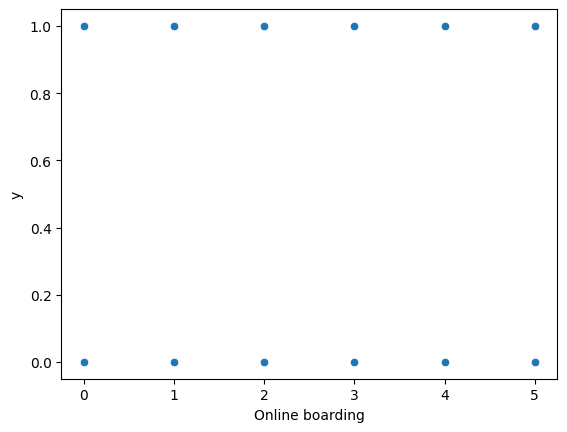

In [29]:
sns.scatterplot(data = X_y_train,x = 'Online boarding',y = 'y')

In [30]:
#так как величины категориальные лучше сделать иначе

In [31]:
col_x = "Online boarding"
col_y = "y"
X_y_train.groupby([col_x,col_y]).agg({"Gender":"count"})

Gender
Online boarding y            
0               False    1022
                True     1297
1               False    8516
                True     1358
2               False   14539
                True     1859
3               False   17588
                True     2808
4               False   10873
                True    18049
5               False    2489
                True    17012

In [32]:
X_y_train.groupby([col_x,col_y],as_index = False).agg({"Gender":"count"}).pivot(index = col_y,columns = col_x,values = "Gender")

Online boarding,0,1,2,3,4,5
y,,,,,,
False,1022,8516,14539,17588,10873,2489
True,1297,1358,1859,2808,18049,17012


In [33]:
numeric_factors = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [34]:
categorical_factors = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

In [35]:
#построим таблицу корреляции для численных факторов

In [36]:
X_y_train[numeric_factors+ ['y']].corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,y
Age,1.000000,0.098764,-0.008189,-0.010931,0.134074
Flight Distance,0.098764,1.000000,0.003788,-0.000151,0.297777
Departure Delay in Minutes,-0.008189,0.003788,1.000000,0.959670,-0.050741
Arrival Delay in Minutes,-0.010931,-0.000151,0.959670,1.000000,-0.057802
y,0.134074,0.297777,-0.050741,-0.057802,1.000000


<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

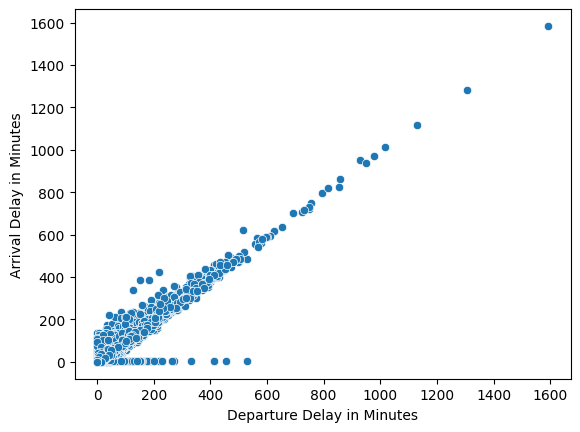

In [37]:
sns.scatterplot(x = X_y_train['Departure Delay in Minutes'],y = X_y_train['Arrival Delay in Minutes'])

In [38]:
#эти факторы линейно зависимы

In [39]:
#рассмотрим случаи когда Departure Delay in Minutes > 60 

In [40]:
X_y_train[X_y_train['Departure Delay in Minutes']>60].corr(numeric_only = True)['y'].sort_values(ascending = False)

y                                    1.000000
Online boarding                      0.477420
Inflight entertainment               0.373470
Seat comfort                         0.372758
Cleanliness                          0.358407
Food and drink                       0.348747
Checkin service                      0.314093
Inflight wifi service                0.301073
Flight Distance                      0.295254
Leg room service                     0.281027
Baggage handling                     0.259417
On-board service                     0.253959
Ease of Online booking               0.186966
Age                                  0.133101
Arrival Delay in Minutes             0.008461
Departure Delay in Minutes           0.006485
Gate location                       -0.005332
Departure/Arrival time convenient   -0.053155
Name: y, dtype: float64

In [41]:
#все еще слабая корреляция

In [42]:
excluded_numeric_factors = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [43]:
X_y_train.groupby("Inflight wifi service").agg({'y':["mean","count"]})

y       
                           mean  count
Inflight wifi service                 
0                      0.997626   2949
1                      0.329143  16786
2                      0.246941  24107
3                      0.251605  24145
4                      0.600570  18599
5                      0.990207  10824

In [44]:
#от 2 до 5 чем больше оценка тем в среднем больше удовлетворенность полетом

In [45]:
useful_categorical_factors = []

for factor in categorical_factors:
    factor_df = X_y_train.groupby(factor, as_index=False).agg({'y': ['mean', 'count']})
    factor_df = factor_df[factor_df[('y', 'count')] > 5000]
    
    diffs = []
    
    for _, row_1 in factor_df.iterrows():
        for _, row_2 in factor_df.iterrows():
            diffs.append(abs(row_1[('y', 'mean')] - row_2[('y', 'mean')]))
            
    if max(diffs) > 0.2:
        useful_categorical_factors.append(factor)

In [46]:
useful_categorical_factors

['Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness']

In [47]:
len(useful_categorical_factors)

15

In [48]:
#лучше не стало)

In [49]:
X_y_train[useful_categorical_factors+['y']].corr(numeric_only = True)

,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,y
Inflight wifi service,1.000000,0.715012,0.340091,0.133316,0.458714,0.122114,0.209914,0.121420,0.159570,0.121047,0.043056,0.130730,0.283292
Ease of Online booking,0.715012,1.000000,0.461326,0.031566,0.405302,0.028880,0.048278,0.040310,0.108684,0.040951,0.008252,0.014708,0.169288
Gate location,0.340091,0.461326,1.000000,-0.002251,0.003700,0.003563,0.004402,-0.028593,-0.004734,0.002078,-0.038156,-0.006263,-0.002206
Food and drink,0.133316,0.031566,-0.002251,1.000000,0.234956,0.575119,0.623271,0.059023,0.033797,0.035810,0.083151,0.658304,0.209757
Online boarding,0.458714,0.405302,0.003700,0.234956,1.000000,0.419520,0.284512,0.154184,0.123405,0.083953,0.204052,0.329480,0.503448
Seat comfort,0.122114,0.028880,0.003563,0.575119,0.419520,1.000000,0.612330,0.131799,0.103900,0.074397,0.188156,0.678926,0.348821
Inflight entertainment,0.209914,0.048278,0.004402,0.623271,0.284512,0.612330,1.000000,0.420629,0.301805,0.379780,0.117699,0.692337,0.396654
On-board service,0.121420,0.040310,-0.028593,0.059023,0.154184,0.131799,0.420629,1.000000,0.359508,0.521066,0.247995,0.123528,0.323291
Leg room service,0.159570,0.108684,-0.004734,0.033797,0.123405,0.103900,0.301805,0.359508,1.000000,0.372365,0.152628,0.096289,0.311889
Baggage handling,0.121047,0.040951,0.002078,0.035810,0.083953,0.074397,0.379780,0.521066,0.372365,1.000000,0.234794,0.096408,0.249289


In [50]:
#смотрим на взаимные корреляции, так как такие факторы будут мешать и переобучать и усложнять модель 

In [51]:
#Inflight wifi service и  Ease of Online booking имеют 0.7 это много

In [52]:
col_x = 'Inflight wifi service'
col_y = 'Ease of Online booking'

X_y_train \
    .groupby([col_x, col_y], as_index=False) \
    .agg({'Gender': 'count'}) \
    .pivot(index = col_y,columns =  col_x,values = 'Gender')

Inflight wifi service,0,1,2,3,4,5
Ease of Online booking,,,,,,
0,2750.0,778.0,291.0,271.0,140.0,53.0
1,194.0,12137.0,1609.0,970.0,978.0,544.0
2,NaN,1260.0,17454.0,1972.0,1157.0,685.0
3,1.0,840.0,2060.0,17596.0,1536.0,685.0
4,1.0,885.0,1352.0,2040.0,13112.0,887.0
5,3.0,886.0,1341.0,1296.0,1676.0,7970.0


In [53]:
#принимаем решение удалить Ease of Online booking	так как она корр с Inflight wifi service	
#и у нее corr с у меньше чем у Inflight wifi service

In [54]:
#проделав тоже самое для остальных категориальных факторов получим

In [55]:
excluded_categorical_factors = ['Ease of Online booking', 'Gate location', 'Food and drink', 'Seat comfort', 'Baggage handling', 'Cleanliness']

In [56]:
numeric_factors_to_use = [x for x in numeric_factors if x not in excluded_numeric_factors]
categorical_factors_to_use = [x for x in categorical_factors if x not in excluded_categorical_factors]

In [57]:
X_y_train_useful_factors = X_y_train[categorical_factors_to_use + numeric_factors_to_use + ['y']]

In [58]:
X_y_train_useful_factors

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y
2049,Male,Loyal Customer,Business travel,Eco,3,2,3,3,3,2,3,41,187,False
49176,Male,disloyal Customer,Business travel,Eco,1,1,1,4,1,1,2,14,1310,False
38346,Female,Loyal Customer,Business travel,Business,5,5,5,4,4,4,4,43,925,True
36699,Male,Loyal Customer,Business travel,Eco,3,4,3,3,3,3,1,50,925,False
20521,Female,Loyal Customer,Personal Travel,Eco,3,2,2,3,3,3,1,55,460,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,Male,Loyal Customer,Business travel,Business,3,5,5,5,5,5,2,50,1428,True
117952,Male,Loyal Customer,Business travel,Business,3,3,5,5,5,2,4,19,946,True
42613,Male,Loyal Customer,Personal Travel,Eco,5,5,5,3,4,5,3,19,493,True
43567,Female,Loyal Customer,Personal Travel,Eco,2,5,5,5,5,2,4,69,925,False


## Преобразование факторов

In [59]:
#целевое кодирование некоторых факторов
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sns.set(rc={'figure.figsize': (11.7, 8.27)})
import warnings
warnings.filterwarnings('ignore')

In [60]:
gender_encoder = BinaryEncoder()
gender_encoder.fit(X_y_train_useful_factors['Gender'])

BinaryEncoder(cols=['Gender'],
              mapping=[{'col': 'Gender',
                        'mapping':     Gender_0  Gender_1
 1         0         1
 2         1         0
-1         0         0
-2         0         0}])

In [61]:
gender_encoder.transform(X_y_train_useful_factors['Gender'])

,Gender_0,Gender_1
2049,0,1
49176,0,1
38346,1,0
36699,0,1
20521,1,0
...,...,...
45891,0,1
117952,0,1
42613,0,1
43567,1,0


In [62]:
gender_type_of_travel_encoder = BinaryEncoder()
gender_type_of_travel_encoder.fit(X_y_train_useful_factors[['Gender', 'Type of Travel']])

BinaryEncoder(cols=['Gender', 'Type of Travel'],
              mapping=[{'col': 'Gender',
                        'mapping':     Gender_0  Gender_1
 1         0         1
 2         1         0
-1         0         0
-2         0         0},
                       {'col': 'Type of Travel',
                        'mapping':     Type of Travel_0  Type of Travel_1
 1                 0                 1
 2                 1                 0
-1                 0                 0
-2                 0                 0}])

In [63]:
gender_type_of_travel_encoded = gender_type_of_travel_encoder\
    .transform(X_y_train_useful_factors[['Gender', 'Type of Travel']])

for col in gender_type_of_travel_encoded:
    X_y_train_useful_factors[col] = gender_type_of_travel_encoded[col]
    
X_y_train_useful_factors = X_y_train_useful_factors.drop(columns=['Gender', 'Type of Travel'])

In [64]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,Loyal Customer,Eco,3,2,3,3,3,2,3,41,187,False,0,1,0,1
49176,disloyal Customer,Eco,1,1,1,4,1,1,2,14,1310,False,0,1,0,1
38346,Loyal Customer,Business,5,5,5,4,4,4,4,43,925,True,1,0,0,1
36699,Loyal Customer,Eco,3,4,3,3,3,3,1,50,925,False,0,1,0,1
20521,Loyal Customer,Eco,3,2,2,3,3,3,1,55,460,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,Loyal Customer,Business,3,5,5,5,5,5,2,50,1428,True,0,1,0,1
117952,Loyal Customer,Business,3,3,5,5,5,2,4,19,946,True,0,1,0,1
42613,Loyal Customer,Eco,5,5,5,3,4,5,3,19,493,True,0,1,1,0
43567,Loyal Customer,Eco,2,5,5,5,5,2,4,69,925,False,1,0,1,0


In [65]:
target_encoded_categories = [x for x in categorical_factors_to_use if x not in ['Gender', 'Type of Travel']]

In [66]:
for col in target_encoded_categories:
    X_y_train_useful_factors[col] = X_y_train_useful_factors[col].astype('category')

In [67]:
X_y_train_useful_factors.dtypes

Customer Type                        category
Class                                category
Inflight wifi service                category
Departure/Arrival time convenient    category
Online boarding                      category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Checkin service                      category
Age                                     int64
Flight Distance                         int64
y                                        bool
Gender_0                                int64
Gender_1                                int64
Type of Travel_0                        int64
Type of Travel_1                        int64
dtype: object

In [68]:
#сделали это чтобы модель лучще понимала 0 и 1

In [69]:
target_encoder = TargetEncoder()
target_encoder.fit(X_y_train_useful_factors[target_encoded_categories], y=X_y_train_useful_factors['y'])

TargetEncoder(cols=['Customer Type', 'Class', 'Inflight wifi service',
                    'Departure/Arrival time convenient', 'Online boarding',
                    'Inflight entertainment', 'On-board service',
                    'Leg room service', 'Checkin service'])

In [70]:
target_encoder.transform(X_y_train_useful_factors[target_encoded_categories])

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service
2049,0.478736,0.188327,0.251605,0.443421,0.137674,0.273650,0.316771,0.278303,0.448453
49176,0.240164,0.188327,0.329143,0.492300,0.137533,0.610346,0.196860,0.205081,0.250846
38346,0.478736,0.694691,0.990207,0.424992,0.872366,0.610346,0.536111,0.580755,0.460151
36699,0.478736,0.188327,0.251605,0.388344,0.137674,0.273650,0.316771,0.276713,0.242364
20521,0.478736,0.188327,0.251605,0.443421,0.113367,0.273650,0.316771,0.276713,0.242364
...,...,...,...,...,...,...,...,...,...
45891,0.478736,0.694691,0.251605,0.424992,0.872366,0.650755,0.648188,0.616631,0.250846
117952,0.478736,0.694691,0.251605,0.441579,0.872366,0.650755,0.648188,0.278303,0.460151
42613,0.478736,0.188327,0.990207,0.424992,0.872366,0.273650,0.536111,0.616631,0.448453
43567,0.478736,0.188327,0.246941,0.424992,0.872366,0.650755,0.648188,0.278303,0.460151


In [71]:
#ДЛЯ КАЖДОГО КАТЕГОРИАЛЬНОГО ФАКТОРА ОН ЗАПИШЕТ В ЯЧЕЙКУ СРЕДНЕЕ ДЛЯ НЕГО ЗНАЧЕНИЯ ПРЕДСКАЗЫВАЕМОЙ ВЕЛЕЧЕНЫ

In [72]:
X_y_train_useful_factors.groupby('Customer Type').agg({'y': 'mean'})

,y
Customer Type,
Loyal Customer,0.478736
disloyal Customer,0.240164


In [73]:
#наглядно посмотреть

In [74]:
categorical_factors_encoded = target_encoder\
    .transform(X_y_train_useful_factors[target_encoded_categories])

for col in categorical_factors_encoded:
    X_y_train_useful_factors[col] = categorical_factors_encoded[col]

In [75]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,0.478736,0.188327,0.251605,0.443421,0.137674,0.273650,0.316771,0.278303,0.448453,41,187,False,0,1,0,1
49176,0.240164,0.188327,0.329143,0.492300,0.137533,0.610346,0.196860,0.205081,0.250846,14,1310,False,0,1,0,1
38346,0.478736,0.694691,0.990207,0.424992,0.872366,0.610346,0.536111,0.580755,0.460151,43,925,True,1,0,0,1
36699,0.478736,0.188327,0.251605,0.388344,0.137674,0.273650,0.316771,0.276713,0.242364,50,925,False,0,1,0,1
20521,0.478736,0.188327,0.251605,0.443421,0.113367,0.273650,0.316771,0.276713,0.242364,55,460,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.478736,0.694691,0.251605,0.424992,0.872366,0.650755,0.648188,0.616631,0.250846,50,1428,True,0,1,0,1
117952,0.478736,0.694691,0.251605,0.441579,0.872366,0.650755,0.648188,0.278303,0.460151,19,946,True,0,1,0,1
42613,0.478736,0.188327,0.990207,0.424992,0.872366,0.273650,0.536111,0.616631,0.448453,19,493,True,0,1,1,0
43567,0.478736,0.188327,0.246941,0.424992,0.872366,0.650755,0.648188,0.278303,0.460151,69,925,False,1,0,1,0


In [76]:
X_y_train_useful_factors['Flight Distance'].max()
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
scaler.fit(X_y_train_useful_factors.drop(columns='y'))

StandardScaler()

In [78]:
X_y_train_useful_factors[X_y_train_useful_factors.drop(columns='y').columns] = \
    scaler.transform(X_y_train_useful_factors.drop(columns='y'))

In [79]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,0.473129,-0.991014,-0.703202,0.240835,-0.969222,-0.776461,-0.715252,-0.928639,0.107145,0.103861,-1.005799,False,-1.016020,1.016020,-0.669201,0.669201
49176,-2.113587,-0.991014,-0.406052,1.655446,-0.969682,0.842415,-1.439955,-1.362309,-1.478325,-1.680678,0.120675,False,-1.016020,1.016020,-0.669201,0.669201
38346,0.473129,1.042498,2.127330,-0.292515,1.424925,0.842415,0.610374,0.862665,0.200998,0.236049,-0.265516,True,0.984233,-0.984233,-0.669201,0.669201
36699,0.473129,-0.991014,-0.703202,-1.353132,-0.969222,-0.776461,-0.715252,-0.938060,-1.546384,0.698707,-0.265516,False,-1.016020,1.016020,-0.669201,0.669201
20521,0.473129,-0.991014,-0.703202,0.240835,-1.048430,-0.776461,-0.715252,-0.938060,-1.546384,1.029177,-0.731955,False,0.984233,-0.984233,1.494319,-1.494319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.473129,1.042498,-0.703202,-0.292515,1.424925,1.036710,1.287738,1.075145,-1.478325,0.698707,0.239040,True,-1.016020,1.016020,-0.669201,0.669201
117952,0.473129,1.042498,-0.703202,0.187523,1.424925,1.036710,1.287738,-0.928639,0.200998,-1.350208,-0.244451,True,-1.016020,1.016020,-0.669201,0.669201
42613,0.473129,-0.991014,2.127330,-0.292515,1.424925,-0.776461,0.610374,1.075145,0.107145,-1.350208,-0.698853,True,-1.016020,1.016020,1.494319,-1.494319
43567,0.473129,-0.991014,-0.721076,-0.292515,1.424925,1.036710,1.287738,-0.928639,0.200998,1.954494,-0.265516,False,0.984233,-0.984233,1.494319,-1.494319


In [80]:
X_train = X_y_train_useful_factors.drop(columns='y')

In [81]:
scaler.transform(X_y_train_useful_factors.drop(columns='y'))[:, 2]

array([-4.36228951, -3.22352969,  6.48510796, ...,  6.48510796,
       -4.43078925, -4.36228951])

In [82]:
#будем пользоватся валидыционной выборкой

In [83]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state = 1000)

In [84]:
model = LogisticRegression()

In [85]:
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
model.predict(X_train)

array([ True,  True,  True, ...,  True,  True, False])

In [87]:
#модель выдает true или false но можно получить и вероятности

In [88]:
model.predict_proba(X_train)#выдает вероятность пренадлежности кажждому из классов в сумме 1

array([[0.00570311, 0.99429689],
       [0.0018666 , 0.9981334 ],
       [0.00875631, 0.99124369],
       ...,
       [0.1717107 , 0.8282893 ],
       [0.44159799, 0.55840201],
       [0.99746559, 0.00253441]])

In [89]:
#для нее отсечкой явл знач 0.5

In [90]:
#точность модели по метрике accuracy на обуч выборке
model.score(X_train,y_train)

0.921704970091846

In [91]:
precision_score(y_train,model.predict(X_train))

0.9121880239142125

In [92]:
recall_score(y_train,model.predict(X_train))

0.9073660363110034

In [93]:
f1_score(y_train,model.predict(X_train))

0.9097706407546455

In [94]:
#теперь посмторим оценку на валид выборке

In [95]:
f1_score(y_val,model.predict(X_val))

0.9128995649706828

In [96]:
#большая точность

In [97]:
#будем подбирать t - отсечку порогового значения и смотреть на метрику f1

In [98]:
best_threshold = None
best_f1 = -float('inf')

probabilities = model.predict_proba(X_val)[:, 1]

for t in range(0, 1001):
    threshold = 0.001 * t
    
    y_val_pred = probabilities > threshold
    f1 = f1_score(y_val, y_val_pred)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

In [99]:
best_f1

0.9129449532622037

In [100]:
best_threshold

0.494

In [101]:
#увеличили на 1 тысячную)

ОЦЕНКА КАЧЕСТВА МОДЕЛИ НА ТЕСТОВОЙ ВЫБОРКЕ

In [102]:
X_test_useful_factors = X_test[categorical_factors_to_use + numeric_factors_to_use]

In [103]:
gender_type_of_travel_encoded = gender_type_of_travel_encoder.transform(X_test_useful_factors[["Gender","Type of Travel"]])

In [104]:
for col in gender_type_of_travel_encoded:
    X_test_useful_factors[col] = gender_type_of_travel_encoded[col]


In [105]:
X_test_useful_factors = X_test_useful_factors.drop(columns=['Gender', 'Type of Travel'])

In [106]:
categorical_factors_encoded = target_encoder\
    .transform(X_test_useful_factors[target_encoded_categories])

for col in categorical_factors_encoded:
    X_test_useful_factors[col] = categorical_factors_encoded[col]

In [107]:
X_test_useful_factors[X_test_useful_factors.columns] = scaler.transform(X_test_useful_factors)

In [108]:
X_test_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
125669,0.473129,-0.991014,-0.703202,0.240835,-0.969222,-1.055199,-1.075463,-0.938060,0.107145,-1.878960,-1.137205,-1.016020,1.016020,1.494319,-1.494319
90648,0.473129,1.042498,-0.703202,0.187523,0.615762,0.842415,0.610374,0.862665,0.200998,0.632613,1.488894,-1.016020,1.016020,-0.669201,0.669201
45322,0.473129,-0.991014,0.634131,0.187523,0.615762,0.842415,-0.715252,1.075145,0.200998,0.830895,0.609181,-1.016020,1.016020,-0.669201,0.669201
64084,0.473129,1.042498,2.127330,-0.292515,-1.048430,-1.407441,0.610374,-1.362309,-1.546384,-0.755362,-0.511274,-1.016020,1.016020,-0.669201,0.669201
71595,0.473129,-0.991014,0.634131,0.240835,-0.969682,0.842415,0.610374,-1.362309,-1.546384,0.963083,-0.859348,0.984233,-0.984233,1.494319,-1.494319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127886,0.473129,1.042498,0.634131,-1.353132,-0.969682,0.842415,0.610374,0.862665,-1.478325,0.566519,2.643455,0.984233,-0.984233,-0.669201,0.669201
37272,0.473129,1.042498,-0.721076,0.240835,1.424925,1.036710,1.287738,1.075145,1.449067,0.896989,0.504860,-1.016020,1.016020,-0.669201,0.669201
36325,0.473129,-0.991014,2.127330,0.187523,1.424925,1.036710,-0.715252,0.862665,-1.478325,-0.557080,-0.884425,-1.016020,1.016020,1.494319,-1.494319
75258,-2.113587,1.042498,-0.406052,1.655446,-0.969682,-1.407441,-0.715252,-0.938060,1.449067,-0.689268,-0.980722,0.984233,-0.984233,-0.669201,0.669201


In [109]:
print('Accuracy на тестовой выборке:', accuracy_score(y_test, model.predict(X_test_useful_factors)))
print('Precision на тестовой выборке:', precision_score(y_test, model.predict(X_test_useful_factors)))
print('Recall на тестовой выборке:', recall_score(y_test, model.predict(X_test_useful_factors)))

Accuracy на тестовой выборке: 0.9224822913458577
Precision на тестовой выборке: 0.9132492113564669
Recall на тестовой выборке: 0.906941972232111


In [110]:
boot_accuracies = []
boot_precisions = []
boot_recalls = []

X_y_test = X_test_useful_factors.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_test_boot = X_y_test.sample(len(X_y_test), replace=True)
    X_test_boot = X_y_test_boot.drop(columns='y')
    y_test_boot = X_y_test_boot['y']
    
    predicted_probas = model.predict_proba(X_test_boot)
    y_pred = predicted_probas[:, 1] >= best_threshold
    
    boot_accuracies.append(accuracy_score(y_test_boot, y_pred))
    boot_precisions.append(precision_score(y_test_boot, y_pred))
    boot_recalls.append(recall_score(y_test_boot, y_pred))

<Axes: ylabel='Count'>

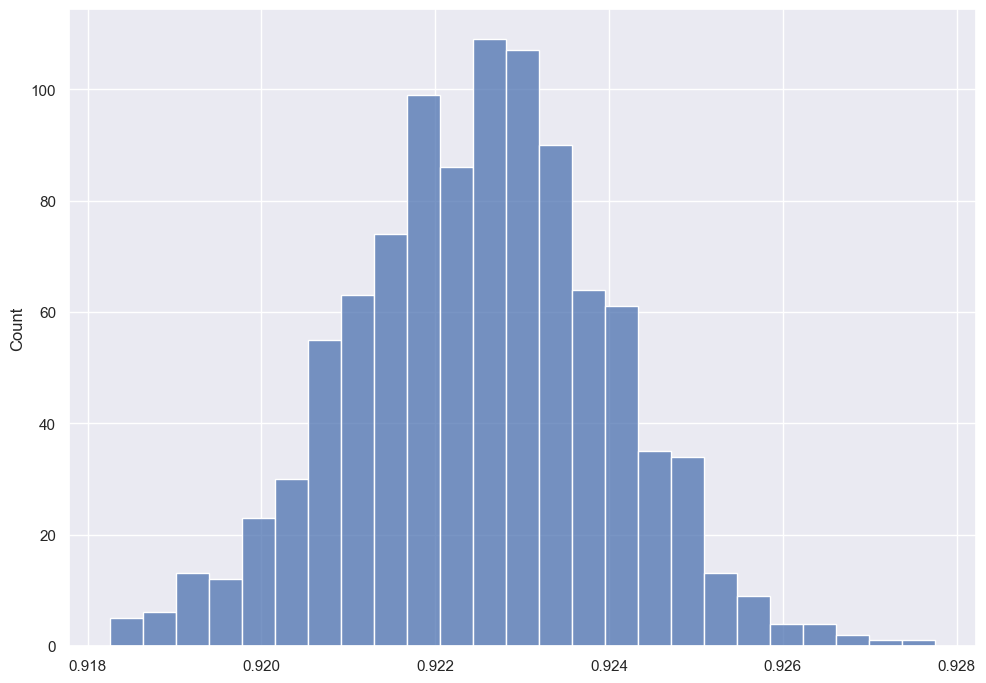

In [111]:
sns.histplot(boot_accuracies)

In [112]:
boot_accuracies_sorted = list(sorted(boot_accuracies))
boot_accuracies_sorted = boot_accuracies_sorted[25:975]

print('Доверительный интервал для accuracy:', 
      '(' + str(round(boot_accuracies_sorted[0], 3)) + ', ' + str(round(boot_accuracies_sorted[-1], 3)) + ')')

Доверительный интервал для accuracy: (0.92, 0.925)


In [113]:
boot_precisions_sorted = list(sorted(boot_precisions))
boot_precisions_sorted = boot_precisions_sorted[25:975]

print('Доверительный интервал для precision:', 
      '(' + str(round(boot_precisions_sorted[0], 3)) + ', ' + str(round(boot_precisions_sorted[-1], 3)) + ')')

Доверительный интервал для precision: (0.907, 0.917)


In [114]:
boot_recalls_sorted = list(sorted(boot_recalls))
boot_recalls_sorted = boot_recalls_sorted[25:975]

print('Доверительный интервал для recall:', 
      '(' + str(round(boot_recalls_sorted[0], 3)) + ', ' + str(round(boot_recalls_sorted[-1], 3)) + ')')

Доверительный интервал для recall: (0.904, 0.914)


In [115]:
model.coef_

array([[ 9.98661700e-01,  5.50299513e-01,  1.74201660e+00,
         2.44646000e-01,  1.10745634e+00,  2.78424709e-01,
         4.76311074e-01,  4.36179297e-01,  5.52450012e-01,
        -5.11715681e-02,  5.40574219e-02, -1.42611861e-03,
         1.42611861e-03, -7.54855547e-01,  7.54855547e-01]])

In [116]:
#по коэффициентам можно понять какие факторы самые вадные

In [117]:
cf = model.coef_
cf[0]

array([ 9.98661700e-01,  5.50299513e-01,  1.74201660e+00,  2.44646000e-01,
        1.10745634e+00,  2.78424709e-01,  4.76311074e-01,  4.36179297e-01,
        5.52450012e-01, -5.11715681e-02,  5.40574219e-02, -1.42611861e-03,
        1.42611861e-03, -7.54855547e-01,  7.54855547e-01])

In [118]:
pd.DataFrame({"lvl significansce":cf[0]},index = X_test_useful_factors.columns).sort_values(by = "lvl significansce",ascending = False)

,lvl significansce
Inflight wifi service,1.742017
Online boarding,1.107456
Customer Type,0.998662
Type of Travel_1,0.754856
Checkin service,0.552450
Class,0.550300
On-board service,0.476311
Leg room service,0.436179
Inflight entertainment,0.278425
Departure/Arrival time convenient,0.244646


In [119]:
from catboost import CatBoostClassifier

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
cat_features = X_train.dtypes


In [170]:
model  = CatBoostClassifier(
    iterations=250,
    learning_rate=0.1,
    verbose = False
)

In [171]:
fac = pd.DataFrame(cat_features).reset_index().rename(columns = {"index":"features",0:"type"})
fac = fac[fac['type'] == "object"]
cat_features = list(fac['features'].values)
cat_features

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [172]:
model.fit(
    X_train,
    y_train,
    cat_features = cat_features
)

In [173]:
model.score(X_test,y_test)

0.9615029257776408

In [174]:
#АХУЕТЬ

In [178]:
import catboost
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создание модели
model = catboost.CatBoostClassifier(iterations=250, learning_rate=0.1,verbose = False)

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели
score = model.score(X_test, y_test)
print("Accuracy: {:.2f}".format(score))

# Использование модели
prediction = model.predict(X_test)

Accuracy: 1.00


In [181]:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [183]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2
